## Random Forest - GOR - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../Desalination_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   effects                     30 non-null     int64  
 1   steam_temperature           30 non-null     int64  
 2   steam_pressure              30 non-null     float64
 3   delta_T                     30 non-null     float64
 4   specific_surface            30 non-null     float64
 5   GOR                         30 non-null     float64
 6   specificSurface_2bins_5050  30 non-null     int64  
 7   specificSurface_8020        30 non-null     int64  
 8   GOR_2bins_5050              30 non-null     int64  
 9   GOR_6733                    30 non-null     int64  
 10  effects_T                   30 non-null     object 
dtypes: float64(4), int64(6), object(1)
memory usage: 2.7+ KB


In [11]:
def prepare_dataset_classification(
    df,
    target = "GOR_2bins_5050",
    representation = ["effects", "delta_T"],
    random_state=42,
    train_size=20
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [12]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=100, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [13]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 5

In [14]:
train_size = 5
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [15]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
5 25
random_state = 42
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 2/10
5 25
random_state = 43
Accuracy: 0.96
F1 macro: 0.9597423510466989
F1 micro: 0.96
F1 weighted: 0.9598711755233496
Kappa: 0.9196141479099679
-------------Iteration 3/10
5 25
random_state = 44
Accuracy: 0.96
F1 macro: 0.96
F1 micro: 0.96
F1 weighted: 0.96
Kappa: 0.9201277955271565
-------------Iteration 4/10
5 25
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.72
F1 macro: 0.7028862478777589
F1 micro: 0.72
F1 weighted: 0.7000339558573853
Kappa: 0.45141065830721006
-------------Iteration 5/10
5 25
random_state = 46
Accuracy: 0.88
F1 macro: 0.8792270531400965
F1 micro: 0.88
F1 weighted: 0.878840579710145
Kappa: 0.7619047619047619
-------------Iteration 6/10
5 25
random_state = 47
Accuracy: 0.88
F1 macro: 0.8792270531400965
F1 micro: 0.88
F1 weighted: 0.878840579710145
Kappa: 0.7619047619047619
-------------Iteration 7/10
5 25
random_state = 48
Accuracy: 0.92
F1 macro: 0.9188311688311688
F1 micro: 0.92
F1 weighted: 0.9192207792207792
Kappa: 0.8387096774193549
-------------Iteration 8/10
5 25
random_state = 49
Accuracy: 0.96
F1 macro: 0.9597423510466989
F1 micro: 0.96
F1 weighted: 0.9598711755233496
Kappa: 0.9196141479099679
-------------Iteration 9/10
5 25
random_state = 50
Accuracy: 0.96
F1 macro: 0.96
F1 micro: 0.96
F1 weighted: 0.96
Kappa: 0.9201277955271565
-------------Iteration 10/10
5 25
random_state = 51
Accuracy: 0.84
F1 ma

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [16]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 5
mean accuracy: 0.9079999999999998 +/- 0.07807688518377255
mean F1 macro: 0.9057318562744856 +/- 0.08244223082688257
mean F1 micro: 0.9079999999999998 +/- 0.07807688518377255
mean F1 weighted: 0.9053561362428271 +/- 0.08325699585913128
mean Kappa: 0.8176958050207807 +/- 0.1529125370597043


In [17]:
compiled_res_5 = pd.DataFrame(metrics_dict())
compiled_res_5.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",1.00,1.000000,1.00,1.000000,1.000000
1,5,"[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...","[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...",0.96,0.959742,0.96,0.959871,0.919614
2,5,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...",0.96,0.960000,0.96,0.960000,0.920128


### training size = 10

In [18]:
train_size = 10
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [19]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
10 20
random_state = 42
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 2/10
10 20
random_state = 43
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 3/10
10 20
random_state = 44
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 4/10
10 20
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.85
F1 macro: 0.8465473145780051
F1 micro: 0.85
F1 weighted: 0.846547314578005
Kappa: 0.7
-------------Iteration 5/10
10 20
random_state = 46
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 6/10
10 20
random_state = 47
Accuracy: 0.9
F1 macro: 0.9
F1 micro: 0.9
F1 weighted: 0.9
Kappa: 0.8
-------------Iteration 7/10
10 20
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.9
F1 micro: 0.9
F1 weighted: 0.9
Kappa: 0.8
-------------Iteration 8/10
10 20
random_state = 49
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 9/10
10 20
random_state = 50
Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 10/10
10 20
random_state = 51
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8


In [20]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 10
mean accuracy: 0.925 +/- 0.03354101966249683
mean F1 macro: 0.9244785333868657 +/- 0.03433821510466624
mean F1 micro: 0.925 +/- 0.03354101966249683
mean F1 weighted: 0.9244785333868656 +/- 0.03433821510466626
mean Kappa: 0.8500000000000002 +/- 0.0670820393249937


In [21]:
compiled_res_10 = pd.DataFrame(metrics_dict())
compiled_res_10.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,10,"[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.95,0.949875,0.95,0.949875,0.9
1,10,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...",0.95,0.949875,0.95,0.949875,0.9
2,10,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, ...",0.95,0.949875,0.95,0.949875,0.9


### training size = 15

In [22]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [23]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 15
random_state = 42
Accuracy: 0.8
F1 macro: 0.7963800904977376
F1 micro: 0.8
F1 weighted: 0.7945701357466064
Kappa: 0.6086956521739131
-------------Iteration 2/10
15 15
random_state = 43
Accuracy: 0.9333333333333333
F1 macro: 0.9321266968325792
F1 micro: 0.9333333333333333
F1 weighted: 0.9327300150829563
Kappa: 0.8648648648648649
-------------Iteration 3/10
15 15
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9333333333333333
F1 macro: 0.9321266968325792
F1 micro: 0.9333333333333333
F1 weighted: 0.9327300150829563
Kappa: 0.8648648648648649
-------------Iteration 4/10
15 15
random_state = 45
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 5/10
15 15
random_state = 46
Accuracy: 0.8666666666666667
F1 macro: 0.8660714285714286
F1 micro: 0.8666666666666667
F1 weighted: 0.8654761904761905
Kappa: 0.736842105263158
-------------Iteration 6/10
15 15
random_state = 47
Accuracy: 0.8
F1 macro: 0.784688995215311
F1 micro: 0.8
F1 weighted: 0.7885167464114832
Kappa: 0.5871559633027523
-------------Iteration 7/10
15 15
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7963800904977376
F1 micro: 0.8
F1 weighted: 0.7981900452488688
Kappa: 0.5945945945945946
-------------Iteration 8/10
15 15
random_state = 49
Accuracy: 0.8
F1 macro: 0.784688995215311
F1 micro: 0.8
F1 weighted: 0.7885167464114832
Kappa: 0.5871559633027523
-------------Iteration 9/10
15 15
random_state = 50
Accuracy: 0.9333333333333333
F1 macro: 0.9333333333333333
F1 micro: 0.9333333333333333
F1 weighted: 0.9333333333333333
Kappa: 0.8672566371681416
-------------Iteration 10/10
15 15
random_state = 51
Accuracy: 0.8666666666666667
F1 macro: 0.8660714285714286
F1 micro: 0.8666666666666667
F1 weighted: 0.8654761904761905
Kappa: 0.736842105263158


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [24]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.8733333333333334 +/- 0.06960204339273698
mean F1 macro: 0.8691867755567447 +/- 0.07351906913294148
mean F1 micro: 0.8733333333333334 +/- 0.06960204339273698
mean F1 weighted: 0.8699539418270069 +/- 0.07276503586254553
mean Kappa: 0.7448272750798199 +/- 0.1413753168686546


In [25]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]",0.800000,0.796380,0.800000,0.79457,0.608696
1,15,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]","[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]",0.933333,0.932127,0.933333,0.93273,0.864865
2,15,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]","[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]",0.933333,0.932127,0.933333,0.93273,0.864865


### training size = 20

In [26]:
train_size = 20
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [27]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 10
random_state = 42
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 2/10
20 10
random_state = 43
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 3/10
20 10
random_state = 44
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 4/10
20 10
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 5/10
20 10
random_state = 46
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 6/10
20 10
random_state = 47
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 7/10
20 10
random_state = 48
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 8/10
20 10
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 9/10
20 10
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
20 10
random_state = 51
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [28]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.95 +/- 0.04999999999999999
mean F1 macro: 0.9494949494949495 +/- 0.0505050505050505
mean F1 micro: 0.95 +/- 0.04999999999999999
mean F1 weighted: 0.9494949494949495 +/- 0.0505050505050505
mean Kappa: 0.9 +/- 0.09999999999999998


In [29]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[0, 1, 0, 0, 1, 0, 1, 1, 1, 0]","[0, 1, 1, 0, 1, 0, 1, 1, 1, 0]",0.9,0.89899,0.9,0.89899,0.8
1,20,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 0]","[1, 0, 1, 0, 1, 1, 0, 0, 0, 0]",0.9,0.89899,0.9,0.89899,0.8
2,20,"[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]","[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]",1.0,1.00000,1.0,1.00000,1.0


### training size = 25

In [30]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [31]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 5
random_state = 42
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 2/10
25 5
random_state = 43
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 3/10
25 5
random_state = 44
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 4/10
25 5
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6153846153846154
-------------Iteration 5/10
25 5
random_state = 46
Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6153846153846154
-------------Iteration 6/10
25 5
random_state = 47
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.7809523809523808
Kappa: 0.5454545454545454
-------------Iteration 7/10
25 5
random_state = 48
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 8/10
25 5
random_state = 49
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.7809523809523808
Kappa: 0.5454545454545454
-------------Iteration 9/10
25 5
random_state = 50
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
25 5
random_state = 51
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [32]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.9199999999999999 +/- 0.09797958971132711
mean F1 macro: 0.9123809523809523 +/- 0.10798504977568278
mean F1 micro: 0.9199999999999999 +/- 0.09797958971132711
mean F1 weighted: 0.9161904761904761 +/- 0.10282186343821546
mean Kappa: 0.8321678321678322 +/- 0.20673769928803473


In [33]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[0, 1, 0, 0, 1]","[0, 1, 0, 0, 1]",1.0,1.0,1.0,1.0,1.0
1,25,"[0, 0, 1, 0, 1]","[0, 0, 1, 0, 1]",1.0,1.0,1.0,1.0,1.0
2,25,"[0, 0, 1, 0, 1]","[0, 0, 1, 0, 1]",1.0,1.0,1.0,1.0,1.0


In [34]:
compiled_res = pd.concat([
    compiled_res_5, 
    compiled_res_10,
    compiled_res_15,
    compiled_res_20,
    compiled_res_25
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

50


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",1.00,1.000000,1.00,1.000000,1.000000
1,5,"[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...","[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...",0.96,0.959742,0.96,0.959871,0.919614
2,5,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...",0.96,0.960000,0.96,0.960000,0.920128
3,5,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",0.72,0.702886,0.72,0.700034,0.451411
4,5,"[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...",0.88,0.879227,0.88,0.878841,0.761905


In [35]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [36]:
compiled_res.to_csv("RF_results_GOR_2bins_5050.csv", sep=",", index=False)

In [37]:
df = pd.read_csv("RF_results_GOR_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   50 non-null     int64  
 1   y_true       50 non-null     object 
 2   y_pred       50 non-null     object 
 3   accuracy     50 non-null     float64
 4   f1_macro     50 non-null     float64
 5   f1_micro     50 non-null     float64
 6   f1_weighted  50 non-null     float64
 7   kappa        50 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ KB


In [38]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",1.00,1.000000,1.00,1.000000,1.000000
1,5,"[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...","[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, ...",0.96,0.959742,0.96,0.959871,0.919614
2,5,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...",0.96,0.960000,0.96,0.960000,0.920128


In [39]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.908000  0.026026  0.905732  0.027481  0.908000  0.026026   
10          0.925000  0.011180  0.924479  0.011446  0.925000  0.011180   
15          0.873333  0.023201  0.869187  0.024506  0.873333  0.023201   
20          0.950000  0.016667  0.949495  0.016835  0.950000  0.016667   
25          0.920000  0.032660  0.912381  0.035995  0.920000  0.032660   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
5             0.905356  0.027752  0.817696  0.050971  
10            0.924479  0.011446  0.850000  0.022361  
15            0.869954  0.024255  0.744827  0.047125  
20            0.949495  0.016835  0.900000  0.033333  
25            0.916190  0.034274  0.832168  0.068913

In [40]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.96296296 0.03703704]
 [0.13043478 0.86956522]]
accuracy: 0.92


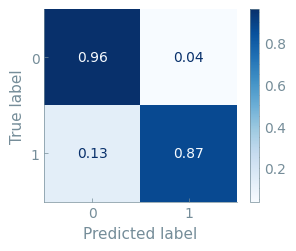

In [41]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_GOR_confusionMatrix_50_50_size25_RF.pdf', bbox_inches='tight')